In [1]:
#Example 1 -A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between twounits. A randomly selected sample of cutlets was collected fromboth units and measured? Analyze the data and draw inferencesat 5% significance level. Please state the assumptions and teststhat you carried out to check validity of the assumptions.

In [2]:
#Import the libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import bartlett

In [3]:
#data is
unit_a = np.array([6.809, 6.4376, 6.9157, 7.3012, 7.4488, 7.3871, 6.8755, 7.0621, 6.684, 6.8236,7.393, 7.5169, 6.9246, 6.9256, 6.5797, 6.8394, 6.597, 7.2705, 7.2828, 7.3495,6.9438, 7.156, 6.5341, 7.2854, 6.9952, 6.8568, 7.2163, 6.6801, 6.9431, 7.0852,6.7794, 7.2783, 7.1561, 7.3943, 6.9405])
unit_b = np.array([6.7703, 7.5093, 6.73, 6.7878, 7.1522, 6.811, 7.2212, 6.6606, 7.2402, 7.0503,6.881, 7.4059, 6.7652, 6.038, 7.1581, 7.024, 6.6672, 7.4314, 7.307, 6.7478,6.8889, 7.422, 6.5217, 7.1688, 6.7594, 6.9399, 7.0133, 6.9182, 6.3346, 7.5459,7.0992, 7.118, 6.6965, 6.578, 7.3875])

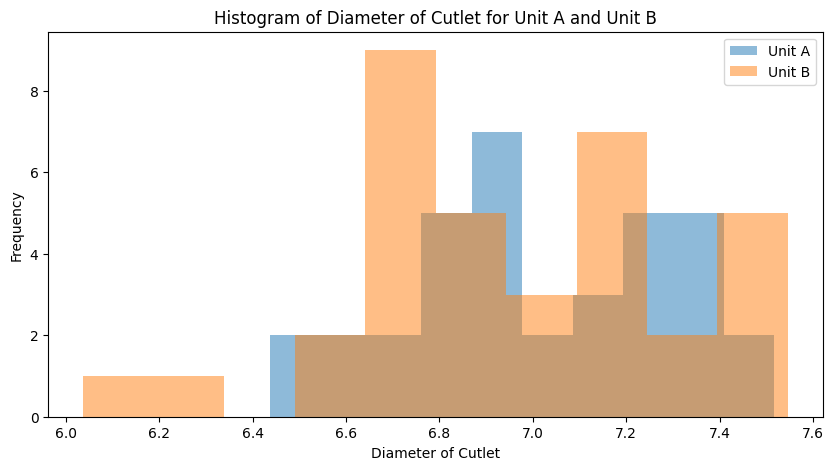

In [4]:
#first assumption is normality
# Plot histograms for visual inspection
plt.figure(figsize=(10, 5))
plt.hist(unit_a, bins=10, alpha=0.5, label='Unit A')
plt.hist(unit_b, bins=10, alpha=0.5, label='Unit B')
plt.xlabel('Diameter of Cutlet')
plt.ylabel('Frequency')
plt.title('Histogram of Diameter of Cutlet for Unit A and Unit B')
plt.legend()
plt.show()

In [5]:
#Second assumption is homogenity of varience
#Perform bartlett test
statistic, p_value = bartlett(unit_a, unit_b)
# Print the results
print("Bartlett's test statistic:", statistic)
print("P-value:", p_value)

Bartlett's test statistic: 1.015399265160413
P-value: 0.3136128077257457


In [6]:
# Determine significance at 5% level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Accept the null hypothesis. Variances are not significantly different.")

Accept the null hypothesis. Variances are not significantly different.


In [7]:
#Example 2- A hospital wants to determine whether there is anydifference in the average Turn Around Time (TAT) of reportsof the laboratories on their preferred list. They collected arandom sample and recorded TAT for reports of 4laboratories. TAT is defined as sample collected to reportdispatch.Analyze the data and determine whether there is andifference in average TAT among the different laboratoriesat 5% significance level.

In [8]:
#Import the libraries
from scipy.stats import f_oneway

In [9]:
lab1 = [185.35, 170.49, 192.77, 177.33, 193.41, 179.45, 191.37, 166.81, 158.81, 165.88,174.75, 193.37, 184.75, 178.54, 180.19, 172.17, 172.0, 184.92, 187.38, 194.17,192.03, 193.77, 178.24, 171.41, 178.3, 176.13, 180.67, 177.38, 190.36, 199.99,181.36, 187.37, 172.93, 187.18, 179.03, 181.69, 185.28, 157.14, 184.42, 183.45,175.5, 169.55, 166.86, 166.33, 173.88, 189.84, 184.88, 188.63, 216.39, 180.57,177.54, 182.34, 187.35, 185.87, 188.01, 182.62, 179.08, 189.96, 169.15, 169.83,181.45, 196.13, 172.02, 181.83, 170.41, 161.99, 138.3, 170.61, 201.27, 202.12,172.62, 159.13, 143.52, 195.85, 186.22, 168.62, 164.88, 155.29, 168.39, 190.02,188.99, 175.49, 190.88, 178.08, 210.38, 164.27, 166.97, 176.16, 199.72, 176.93,185.16, 161.05, 186.32, 149.24, 168.62, 171.64, 185.42, 162.43, 178.81, 172.65,164.65, 178.52, 170.11, 167.15, 190.32, 167.25, 179.2, 171.65, 166.35, 175.41,172.05, 181.88, 201.11, 154.21, 145.89, 178.49, 176.08, 202.48, 182.4, 182.09]

lab2 = [165.53, 185.91, 194.92, 183.0, 169.57, 197.0, 166.36, 169.6, 175.36, 198.68,189.12, 140.55, 160.44, 167.03, 182.67, 155.73, 183.07, 177.7, 191.62, 186.85,161.09, 173.01, 199.43, 185.67, 182.69, 180.45, 182.37, 189.99, 167.55, 190.09,168.01, 176.5, 173.54, 153.75, 212.8, 179.32, 173.56, 217.86, 187.57, 163.69,186.49, 171.31, 202.29, 197.68, 156.89, 168.03, 173.09, 187.52, 193.28, 178.04,197.45, 172.35, 167.63, 194.24, 179.43, 183.62, 157.92, 173.55, 180.86, 161.02,178.42, 165.12, 183.75, 186.77, 177.59, 167.9, 178.21, 170.73, 199.62, 186.03,156.23, 158.08, 163.74, 161.45, 163.45, 178.17, 194.1, 182.6, 168.51, 191.89,180.53, 165.45, 168.8, 159.92, 188.49, 174.43, 168.2, 195.07, 193.79, 175.16,170.66, 183.98, 174.54, 197.18, 215.17]

lab3 = [176.7, 198.45, 201.23, 199.61, 204.63, 181.51, 214.21, 183.43, 191.6, 208.43,231.0, 198.37, 226.62, 214.44, 159.69, 214.14, 212.29, 209.25, 198.54, 229.02,214.71, 172.27, 205.31, 180.35, 214.58, 231.76, 215.78, 201.78, 191.64, 217.56,193.04, 217.66, 198.68, 206.49, 198.81, 199.91, 190.34, 181.87, 214.39, 189.61,203.58, 196.64, 225.42, 175.13, 228.21, 229.33, 170.58, 177.76, 207.34, 178.07,188.32, 193.26, 201.17, 192.75, 192.81, 183.1, 181.92, 209.43, 180.11, 172.92,205.01, 206.46, 192.48, 237.49, 173.08, 193.08, 203.24, 215.17, 186.83, 199.7,225.14, 213.18, 237.23, 189.98, 193.63, 184.7, 175.87, 180.94, 211.19, 205.54,219.55, 197.33, 205.62, 238.7, 192.5, 208.35, 208.04, 222.47, 207.6, 194.59,184.28, 174.55, 188.53, 204.28, 202.95, 177.62, 201.99, 195.6, 175.36, 187.6,208.33, 172.86, 211.64, 183.19, 203.05, 197.88, 203.39, 193.8, 215.25, 203.99,194.52, 221.49]

lab4 = [166.13, 160.79, 185.18, 176.42, 152.6, 161.12, 154.02, 163.25, 152.79, 161.98,171.22, 183.67, 142.95, 152.37, 163.81, 156.06, 176.44, 173.68, 161.49, 175.05,150.22, 148.17, 166.21, 145.4, 166.42, 132.21, 143.26, 154.06, 179.08, 144.82,184.64, 188.49, 198.69, 142.43, 169.68, 174.79, 133.31, 176.42, 176.67, 158.2,157.02, 154.55, 157.58, 161.96, 168.14, 180.14, 170.28, 166.68, 161.42, 153.97,167.5, 165.43, 150.83, 149.96, 161.94, 146.46, 174.83, 181.66, 164.82, 181.35,176.21, 152.4, 159.63, 156.56, 168.11, 145.07, 128.93, 165.95, 181.76, 168.17,162.11, 177.03, 124.06, 138.48, 167.83, 165.07, 153.74, 172.72, 159.97, 167.26,164.98, 154.06, 168.92, 168.9, 157.48, 164.03, 162.76, 173.37, 152.13, 187.08,162.84, 162.67, 157.21, 156.79, 172.38, 167.62, 172.72, 167.55, 132.49, 166.18,176.79, 197.98, 184.78, 180.51, 167.27, 159.34, 142.35, 167.07, 126.94, 205.18,152.31, 191.26, 160.98, 192.23, 139.34, 172.68, 177.64, 170.27, 150.87, 162.21]

In [10]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(lab1, lab2, lab3, lab4)

In [11]:
# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 116.57384865619953
P-Value: 1.1819704443922997e-55


In [12]:
# Determine significance at 5% level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average TAT among the laboratories.")
else:
    print("Accept the null hypothesis. There is no significant difference in average TAT among the laboratories.")

Reject the null hypothesis. There is a significant difference in average TAT among the laboratories.


In [13]:
#Example 3-Sales of products in four different regions is tabulated for males and females.Find if male-female buyer rations are similar across regions.HO:All proportions are equal.HA:Not all Proportions are equal.1.Check p-value2.If p-Value < alpha we reject NullHypothesis

In [14]:
#Import the libraries
import numpy as np
from scipy.stats import chi2_contingency

In [15]:
#Data is
observed_values = np.array([[50, 142, 131, 70],
                            [435, 1523, 1356, 750]])

In [16]:
# Perform chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(observed_values)

In [17]:
# Print the results
print("Chi-square Statistic:", chi2_stat)
print("P-Value:", p_val)

Chi-square Statistic: 1.595945538661058
P-Value: 0.6603094907091882


In [18]:
# Determine significance level
alpha = 0.05

In [19]:
# Check p-value
if p_val < alpha:
    print("Reject the null hypothesis. Not all proportions are equal.")
else:
    print("Accept the null hypothesis. All proportions are equal.")

Accept the null hypothesis. All proportions are equal.


In [20]:
#Example4-TeleCall uses 4 centers around the globe to processcustomer order forms. They audit a certain % of thecustomer order forms. Any error in order formrenders it defective and has to be reworked beforeprocessing. The manager wants to check whether thedefective % varies by centre. Please analyze the dataat 5% significance level and help the manager drawappropriate inferences

In [21]:
#Import  the libraries 
import numpy as np
from scipy.stats import chi2_contingency

In [22]:
#data is 
data = {'Phillippines': ['Error Free'] * 91 + ['Defective'] * 9,'Indonesia': ['Error Free'] * 93 + ['Defective'] * 7,'Malta': ['Error Free'] * 94 + ['Defective'] * 6,'India': ['Error Free'] * 98 + ['Defective'] * 2}

In [23]:
# Convert data to numpy array
observed_values = np.array([[data['Phillippines'].count('Error Free'), data['Indonesia'].count('Error Free'), data['Malta'].count('Error Free'), data['India'].count('Error Free')],[data['Phillippines'].count('Defective'), data['Indonesia'].count('Defective'), data['Malta'].count('Defective'), data['India'].count('Defective')]])


In [24]:
# Perform chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(observed_values)

In [25]:
# Print the results
print("Chi-square Statistic:", chi2_stat)
print("P-Value:", p_val)

Chi-square Statistic: 4.609929078014184
P-Value: 0.20269196796804


In [26]:
# Determine significance level
alpha = 0.05
# Check p-value
if p_val < alpha:
    print("Reject the null hypothesis. The defective percentage varies by center.")
else:
    print("Accept the null hypothesis. The defective percentage does not vary significantly by center.")

Accept the null hypothesis. The defective percentage does not vary significantly by center.
